In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_ipo = pd.read_csv('../data/cb_ipos.csv', parse_dates=['public_at'])

In [3]:
df_ipo.head().T

,0,1,2,3,4
id,1,2,3,4,5
ipo_id,1,2,3,4,5
object_id,c:1654,c:1242,c:342,c:59,c:317
valuation_amount,NaN,NaN,NaN,NaN,1e+11
valuation_currency_code,USD,USD,USD,USD,USD
raised_amount,NaN,NaN,NaN,NaN,NaN
raised_currency_code,USD,NaN,NaN,NaN,NaN
public_at,1980-12-19 00:00:00,1986-03-13 00:00:00,1969-06-09 00:00:00,2004-08-25 00:00:00,1997-05-01 00:00:00
stock_symbol,NASDAQ:AAPL,NASDAQ:MSFT,NYSE:DIS,NASDAQ:GOOG,NASDAQ:AMZN
source_url,NaN,NaN,NaN,NaN,NaN


In [4]:
df_ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 13 columns):
id                         1259 non-null int64
ipo_id                     1259 non-null int64
object_id                  1254 non-null object
valuation_amount           108 non-null float64
valuation_currency_code    1257 non-null object
raised_amount              139 non-null float64
raised_currency_code       699 non-null object
public_at                  659 non-null datetime64[ns]
stock_symbol               1259 non-null object
source_url                 191 non-null object
source_description         180 non-null object
created_at                 1259 non-null object
updated_at                 1259 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 127.9+ KB


interesting to note is that in the investment data we found that we had information about 17000 companies and this dataset gives us information about 1259 public companies, some included in the dataset and some not. from this we can speculate to say only 1 in 170 companies that recieve funding end up ipo. Thus our dataset is going to be imbalanced and we should take that into account when developing our models

In [5]:
list(df_ipo.columns)

['id',
 'ipo_id',
 'object_id',
 'valuation_amount',
 'valuation_currency_code',
 'raised_amount',
 'raised_currency_code',
 'public_at',
 'stock_symbol',
 'source_url',
 'source_description',
 'created_at',
 'updated_at']

In [6]:
df = df_ipo
removed = ['id',

 'valuation_amount',
 'valuation_currency_code',
 'raised_amount',
 'raised_currency_code',
 'public_at',
 'stock_symbol',
 'source_url',
 'source_description',
 'created_at',
 'updated_at']
keep = [x for x in list(df.columns) if x not in removed]
df = df[keep]
df.head().T

,0,1,2,3,4
ipo_id,1,2,3,4,5
object_id,c:1654,c:1242,c:342,c:59,c:317


In [7]:
keep

['ipo_id', 'object_id']

In [8]:
df_ipo['month'] = df_ipo['public_at'].apply(lambda x: x.month)

In [9]:
df_ipo['year'] = df_ipo['public_at'].apply(lambda x: x.year)

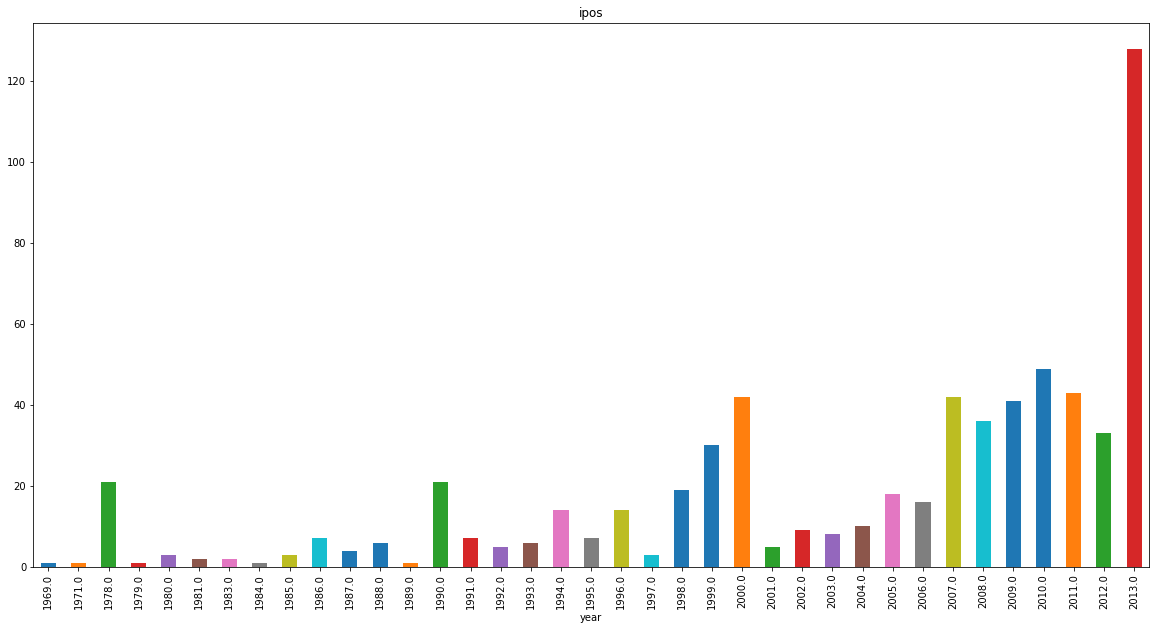

In [11]:
plot = df_ipo.groupby(['year']).count()['id'].plot(kind="bar", figsize=(20,10), title= "ipos");
plot.get_figure().savefig('ipo')

we have information about companies from 1969 to 2013. from the bar graph abouve it shows that in 2013 there was a spike in companies ipoing. interesting thing to note is that the number of companies ipoing decreased after the dotcom boom, but the number of companies ipoing after the recession did not change. the spike in 2013 could also be because crunchbase got better at collecting information around then.